## Can Stablecoins by a critical sink for US Treasuries?

Author: [paulx.eth](https://warpcast.com/paulx.eth) on Farcaster | [paulapivat](https://twitter.com/paulapivat) on X

#### Background

The total current stablecoin market cap is approximately [$147 billion](https://defillama.com/stablecoins). Different stablecoin models have been tried over the years, with fiat, crypto and algorithmic backing as the broad categories. The collapse of [Terra Luna](https://www.nber.org/papers/w31160) highlighted the importance of collateral backing, compelling the industry to adopt safer collateral assets, namely US Treasury Debt for dollar-pegged stablecoins.

**But how much of the top stablecoins are backed by US Treasuries?**

We'll first consult [rwa.xyz](https://app.rwa.xyz/stablecoins) stablecoin directory which lists different attributes:

<img src="./png/stablecoin_underlying.png" style="width: 75%;"/>

The screencap above shows stablecoin name, ticker, market cap, price, pegged currency and underlying assets, among other things. At the time of this writing, 58 stablecoins were listed, but only 15 had "US Treasury Debt" listed as one of several underlying assets ([source](https://app.rwa.xyz/stablecoins)).

However, to get more exact figures, we had to go directly to **attestation reports** or proof of reserves by independent accountants. At the moment, there is little consensus on stablecoin reserve reporting. For example, most stablecoins have monthly reports, while some are quarterly or yearly. New projects, like Frax Finance, have [real-time balance sheets](https://facts.frax.finance/frax/balance-sheet) available. 

Here's a breakdown of different reporting cadence by ticker:

```
Yearly:         DAI*
Quarterly:      USDT
Monthly:        USDC, DFUSD, PYUSD, USDP, USDM, GUSD, ZUSD 
Daily:          USDV (STBT)
Real-time:      FRAX
```

*DAI is arguably real time with this [page](https://daistats.com/#/collateral), but discerning the different types of RWAs (real world assets) was unclear. 

Nevertheless, information of how much of the collateral backing for the stablecoins listed above are held in US Treasury _today_ is available (as of Jan 31, 2024), let's take a look:


In [ ]:
!pip install pandas
import pandas as pd

stablecoin_tbills_path = './data/stablecoin_tbills.csv'

stablecoin_tbills_df = pd.read_csv(stablecoin_tbills_path)

The below table shows a list of stablecoins and their current reserve of US Treasury Bills backing their supply of circulating stablecoins. We can sum `tbills_amount_current` to confirm the amount of stablecoin reserves held in US Treasuries today.

This comes out to **$82.5 billion** ($82,538,358,331) in US Treasuries or, roughly **65%** of the value of major stable coins in circulation. Moreover, it contextually important to see how we got here, to be able to make some rough guesstimate on where we’ll be in 10 years time. 

**note**: These are the stablecoin projects where attestations were provided via independent accountants showing end of month balances for US Treasuries (including short-dated treasuries, overnight repurchase agreements). 

In [11]:
current_tbills_filtered = (
    stablecoin_tbills_df[['name', 'ticker', 'tbills_amount_current', 'date_current_attestation']]
    .loc[stablecoin_tbills_df['name'].notna()]
)

current_tbills_filtered

,name,ticker,tbills_amount_current,date_current_attestation
0,Tether USD,USDT,"63,086,013,400",2023-12-31
1,Circle USD Coin,USDC,"15,342,000,000",2024-01-31
2,MakerDAO Dai,DAI,"1,680,000,000",2023-12-31
3,First Digital Labs USD,FDUSD,"1,531,578,778",2024-01-31
4,Frax Finance,FRAX,"1,940,686",NaN
5,Tether Euro,EURT,"283,045,376",NaN
6,Paypal USD (Paxos),PYUSD,"303,541,803",2024-01-31
7,Pax Dollar (Paxos),USDP,"124,525,000",2024-01-31
8,Mountain Protocol USD,USDM,"151,967,269",2024-02-29
9,Gemini Dollar,GUSD,"10,213,348",2024-01-31


In [10]:
formatted_total = "${:,.0f}".format(
    current_tbills_filtered['tbills_amount_current']
    .replace('[\,]', '', regex=True)
    .astype(float)
    .sum()
)

formatted_total


'$82,538,358,331'

### Methodology

The [stablecoin directory on rwa.xyz](https://app.rwa.xyz/stablecoins) provided a starting point for identifying which stablecoins could potentially have US Treasury as an underlying asset. From there, we combed through independent attestations reports from various accounting firms. Nearly all early attestations reports only mentioned how much of a stablecoin’s circulating supply was backed by “U.S. dollars”. 

Only over time the reports provided more nuanced in delineating U.S. Treasury Bills (with maturity dates, Cusip numbers), Overnight reverse repurchase agreements etc. 

For simplicity, we include a stablecoin's Total U.S. Treasury Bills at time of attestation into the dataset. 

Moreover, we try to document earliest mention of "U.S. Treasury" in various attestation reports. Here, we can begin to get a sense for how reporting has evolved over the last couple years.

In [15]:
earliest_tbills_filtered = (
    stablecoin_tbills_df[['name', 'ticker', 'date_earliest_attestation', 'tbills_amount_earliest', 'attestation_interval']]
    .loc[stablecoin_tbills_df['name'].notna()]
)

earliest_tbills_filtered

,name,ticker,date_earliest_attestation,tbills_amount_earliest,attestation_interval
0,Tether USD,USDT,2021-07-30,"15,279,528,705",quarterly
1,Circle USD Coin,USDC,2021-05-28,"2,700,000,000",monthly
2,MakerDAO Dai,DAI,2022-12-31,"640,000,000",yearly
3,First Digital Labs USD,FDUSD,2023-11-30,"857,505,738",monthly
4,Frax Finance,FRAX,NaN,NaN,real_time
5,Tether Euro,EURT,NaN,NaN,NaN
6,Paypal USD (Paxos),PYUSD,2023-08-31,"43,860,001",monthly
7,Pax Dollar (Paxos),USDP,2018-12-31,"142,326,370",monthly
8,Mountain Protocol USD,USDM,2023-09-30,"2,284,325",monthly
9,Gemini Dollar,GUSD,2019-05-31,"21,526,280",monthly


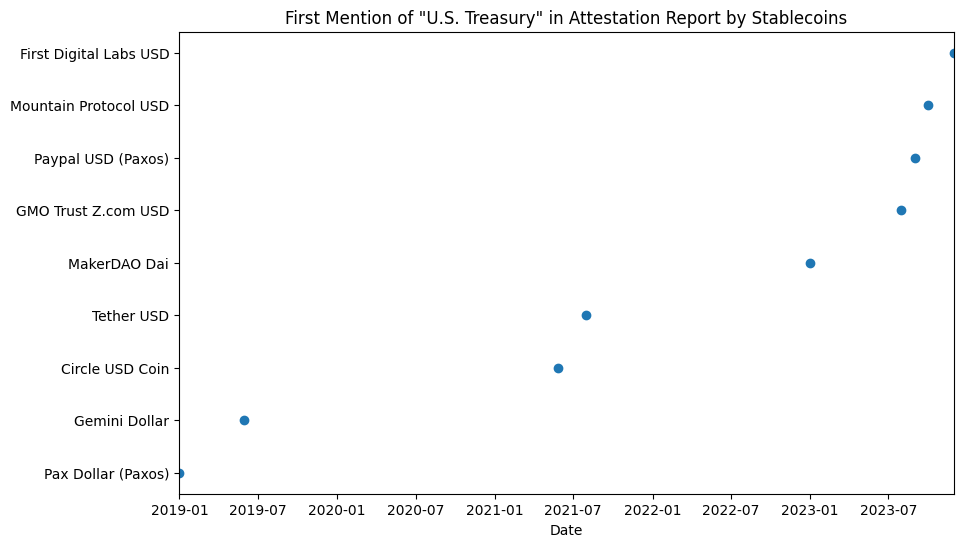

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime



earliest_df = earliest_tbills_filtered[['date_earliest_attestation', 'name']]

earliest_df = earliest_df.copy()

earliest_df['date_earliest_attestation'] = pd.to_datetime(earliest_df['date_earliest_attestation'])
earliest_df.sort_values('date_earliest_attestation', inplace=True)

earliest_df['date_earliest_attestation'] = pd.to_datetime(earliest_df['date_earliest_attestation'])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(earliest_df['date_earliest_attestation'], earliest_df['name'])

# Setting the date range on the x-axis
plt.xlim([datetime(2018, 12, 31), datetime(2023, 11, 30)])

# Formatting
plt.xlabel('Date')
plt.title('First Mention of "U.S. Treasury" in Attestation Report by Stablecoins')

# Show plot
plt.show()

In [22]:
tbills_growth = (
    stablecoin_tbills_df[['name', 'ticker', 'market_cap_current', 'market_cap_earliest', 'tbills_amount_current', 'tbills_amount_earliest']]
    .loc[stablecoin_tbills_df['tbills_amount_earliest'].notna()]
)

tbills_growth

,name,ticker,market_cap_current,market_cap_earliest,tbills_amount_current,tbills_amount_earliest
0,Tether USD,USDT,"91,572,956,801","62,610,829,196","63,086,013,400","15,279,528,705"
1,Circle USD Coin,USDC,"26,739,379,540","22,176,182,251","15,342,000,000","2,700,000,000"
2,MakerDAO Dai,DAI,"5,190,000,000","5,062,000,000","1,680,000,000","640,000,000"
3,First Digital Labs USD,FDUSD,"2,578,169,834","965,652,971","1,531,578,778","857,505,738"
6,Paypal USD (Paxos),PYUSD,"301,175,241","44,376,440","303,541,803","43,860,001"
7,Pax Dollar (Paxos),USDP,"353,101,046","142,326,370","124,525,000","142,326,370"
8,Mountain Protocol USD,USDM,"152,286,933","2,468,314","151,967,269","2,284,325"
9,Gemini Dollar,GUSD,"37,478,807","21,526,280","10,213,348","21,526,280"
10,GMO Trust Z.com USD,ZUSD,"19,033,372","16,283,065","17,901,832","1,033,658"


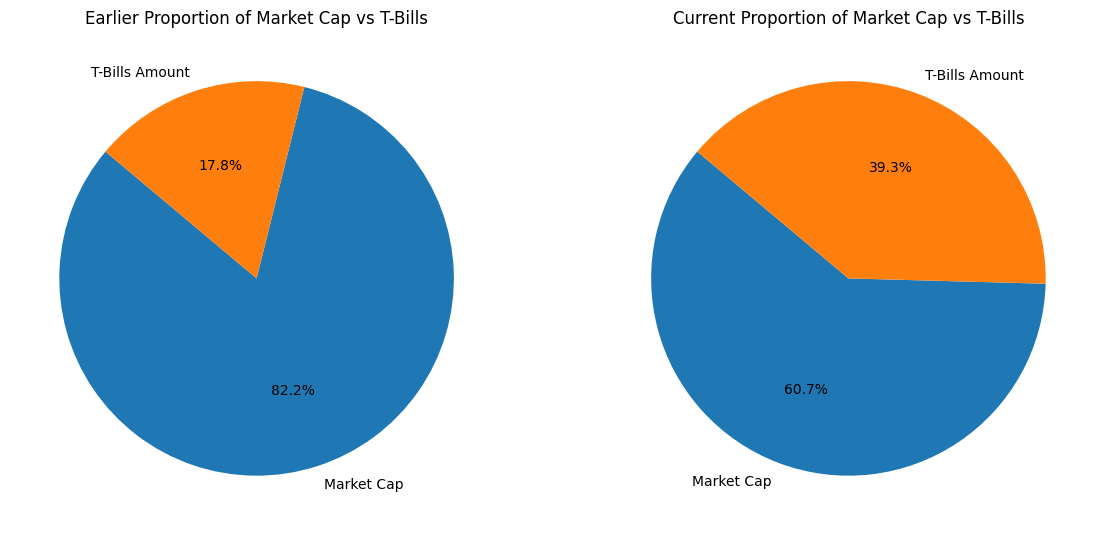

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

def convert_to_float(df, columns):
    for col in columns:
        df[col] = df[col].str.replace(',', '').astype(float)
    return df

columns_to_convert = ['market_cap_current', 'market_cap_earliest', 'tbills_amount_current', 'tbills_amount_earliest']
tbills_growth = convert_to_float(tbills_growth, columns_to_convert)

# Calculating total sums for current and earliest market caps and tbills amounts
total_market_cap_current = tbills_growth['market_cap_current'].sum()
total_market_cap_earliest = tbills_growth['market_cap_earliest'].sum()
total_tbills_current = tbills_growth['tbills_amount_current'].sum()
total_tbills_earliest = tbills_growth['tbills_amount_earliest'].sum()

# Data for the pie charts
data_earliest = [total_market_cap_earliest, total_tbills_earliest]
data_current = [total_market_cap_current, total_tbills_current]
labels = ['Market Cap', 'T-Bills Amount']

# Creating the pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Earliest data pie chart
axes[0].pie(data_earliest, labels=labels, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Earlier Proportion of Market Cap vs T-Bills')

# Current data pie chart
axes[1].pie(data_current, labels=labels, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Current Proportion of Market Cap vs T-Bills')

plt.show()

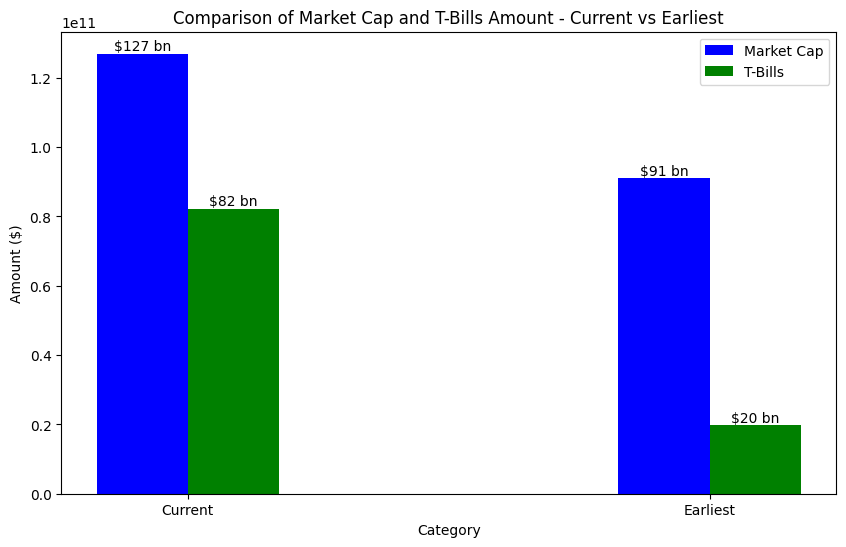

In [28]:
import matplotlib.pyplot as plt

# Function to format values in billions
def format_billion(value):
    return f"${value / 1e9:.0f} bn"

# Creating the bar charts
plt.figure(figsize=(10, 6))

# Width of the bars
bar_width = 0.35

# Positions of the bars
bar1 = [1, 3]
bar2 = [x + bar_width for x in bar1]

# Plotting market cap and tbills for current and earliest
plt.bar(bar1, [total_market_cap_current, total_market_cap_earliest], color='blue', width=bar_width, label='Market Cap')
plt.bar(bar2, [total_tbills_current, total_tbills_earliest], color='green', width=bar_width, label='T-Bills')

# Adding labels
plt.text(bar1[0], total_market_cap_current, format_billion(total_market_cap_current), ha='center', va='bottom')
plt.text(bar1[1], total_market_cap_earliest, format_billion(total_market_cap_earliest), ha='center', va='bottom')
plt.text(bar2[0], total_tbills_current, format_billion(total_tbills_current), ha='center', va='bottom')
plt.text(bar2[1], total_tbills_earliest, format_billion(total_tbills_earliest), ha='center', va='bottom')

# Formatting
plt.xlabel('Category')
plt.ylabel('Amount ($)')
plt.title('Comparison of Market Cap and T-Bills Amount - Current vs Earliest')
plt.xticks([r + bar_width/2 for r in bar1], ['Current', 'Earliest'])
plt.legend()

# Show plot
plt.show()

In [26]:

def format_and_display_sums(dataframe, columns):
    formatted_totals = {}
    for col in columns:
        sum_value = dataframe[col].replace('[\,]', '', regex=True).astype(float).sum()
        formatted_totals[col] = "${:,.0f}".format(sum_value)
    return formatted_totals

# Columns to be summed and formatted
columns_to_sum = ['market_cap_current', 'market_cap_earliest', 'tbills_amount_current', 'tbills_amount_earliest']

# formatted sum from tbills_growth dataframe
formatted_sums = format_and_display_sums(tbills_growth, columns_to_sum)

# Display the formatted values
for name, value in formatted_sums.items():
    print(f"{name}: {value}")

market_cap_current: $126,943,581,574
market_cap_earliest: $91,041,644,887
tbills_amount_current: $82,247,741,430
tbills_amount_earliest: $19,688,065,077


In [13]:
stablecoin_tbills_df.columns

Index(['name', 'ticker', 'networks', 'market_cap_current',
       'market_cap_earliest', 'tbills_amount_current',
       'tbills_amount_earliest', 'attestation_interval',
       'date_current_attestation', 'date_earliest_attestation', 'price',
       'pegged_currency', 'underlying_assets', 'underlying_assets_tbills',
       'incorporation_country', 'regulatory', 'rating_by_bluechip',
       'weekly_active_addresses', 'weekly_transfer_volume',
       'contract_addresses'],
      dtype='object')

The take-away is, stable coins, as the first truly PMF of crypto has had remarkable growth and will continue to do so, US Treasuries backing stable coins has grown even faster. 

	•	The proportion of stablecoin market cap backed by the US Treasury has markedly increased. Initially, approximately 20.9% ($19 billion of $91 billion) of the stablecoin market was backed by US Treasury assets. In the current scenario, this backing has risen to approximately 64.1% ($82 billion of $128 billion).
	•	This shift indicates a move towards greater security and reliability within the stablecoin ecosystem. By increasing the proportion of backing with highly liquid and traditionally stable assets like US Treasury securities, the stability and trust in stablecoins likely improve.
	•	For investors and users of stablecoins, this increase in US Treasury backing may be a positive sign, signaling enhanced safety and potentially lower risk.

The data points to a robust growth trend not only in the market cap of stablecoins but also, and perhaps more critically, in the proportion of this market cap that is backed by US Treasury securities. This trend underlines an evolving landscape in the stablecoin market, characterized by heightened safety, stability, and reliance on established financial assets.